In [1]:
# Ramachandran S - 23b1052 
# Keyaan KR - 23b0977 
# Harith S - 23b1085

#This code is for question 3.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats as stats

In [2]:
# reading the data and reading it into an array

f = open("3.data", "r")

data = np.zeros(10000)
index = 0
for line in f:
    data[index] = line
    index = index + 1

In [3]:
# calculating the first moment

moment_1 = np.mean(data)

# calculating the second moment

sq = np.square(data)
moment_2 = np.mean(sq)

In [4]:
print(moment_1, moment_2)

6.496145618324817 46.554361807879815


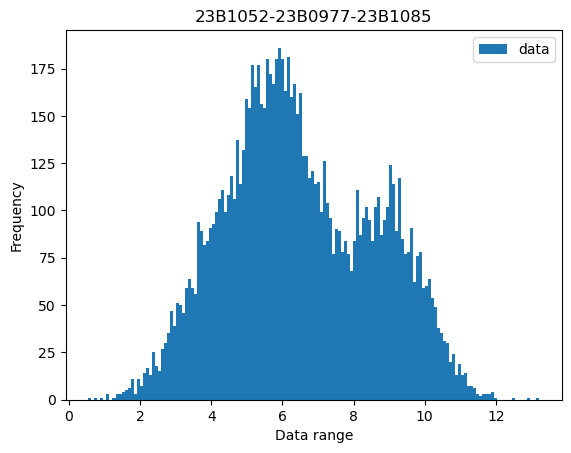

In [5]:
# 3b part

plt.title("23B1052-23B0977-23B1085")
plt.xlabel("Data range")
plt.ylabel("Frequency")

plt.hist(data, 150, label="data")
plt.legend()
plt.savefig("3b.png")
plt.show()

In [6]:
# from the image we can see that most of the values fall near 6, so we can guess the mean to be around 6  

# function which takes in a vector and return the first and second moment for binomial distribution

def ub(v):
    n = int(v[0])
    p = v[1]
    mean_1 = n*p
    mean_2 = n*p + (n**2)*(p**2) - (n * (p ** 2))
    return [mean_1 - moment_1, mean_2 - moment_2]


n is 20 and p is 0.32480705828861955


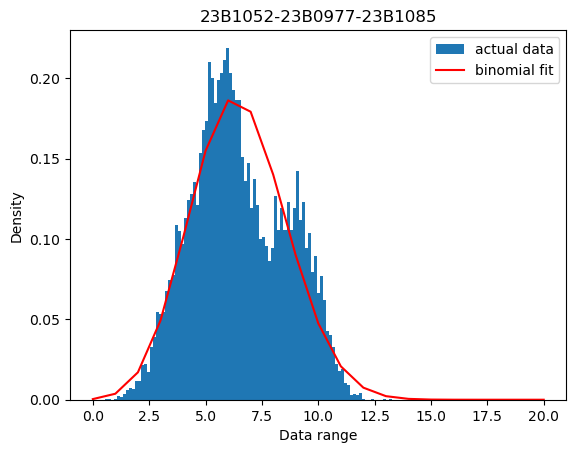

In [15]:
# 3 c part

# initial guess is n = 20

root = scipy.optimize.fsolve(ub,[20, 0.5])


n1 = int(root[0]) # add data condition later to round off properly
n2 = int(root[0]) + 1

p = root[1]
if sum(ub([n1, p])) > sum(ub([n2, p])):
    n = n2
else:
    n = n1 # add data condition later to round off properly
p = root[1]
print(f"n is {n} and p is {p}")

x = np.arange(n + 1)
bins = np.linspace(0, 20, 150)


plt.title("23B1052-23B0977-23B1085")
plt.hist(data, bins = bins, density = True, label="actual data")  
plt.plot(x, stats.binom.pmf(x,n,p), "r", label = "binomial fit")
plt.xlabel("Data range")
plt.ylabel("Density")
plt.legend()
plt.savefig("3c.png")
plt.show()

In [8]:
# function which takes in a vector and return the first and second moment for gamma distribution

def ug(v):
    k = v[0]
    theta = v[1]
    mean_1 = theta * k
    mean_2 = (theta ** 2) * k * (k + 1)

    return [mean_1 - moment_1, mean_2 - moment_2]

k is 9.691205539905933 and theta is 0.6703134703594839


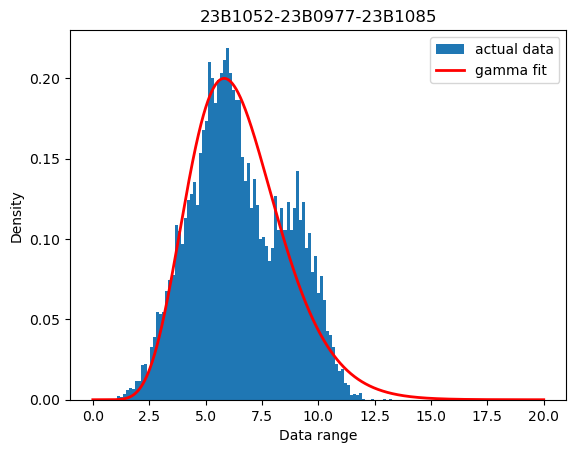

In [9]:
# # 3d part

root = scipy.optimize.fsolve(ug,[100, 0.5])
k = root[0] # add a condition later to round off properly
theta = root[1]

print(f"k is {k} and theta is {theta}")
x = np.linspace(0, 20, 1000)
pdf = stats.gamma.pdf(x, a = k, loc = 0, scale = theta)
plt.title("23B1052-23B0977-23B1085")
plt.hist(data, bins = bins, density = True, label="actual data")  
plt.plot(x, pdf, "r", lw = 2,label = "gamma fit")
plt.xlabel("Data range")
plt.ylabel("Density")
plt.legend()
plt.savefig("3d.png")
plt.show()

In [16]:
# 3e

rounded_data = np.round(data)
prob_b_likely = stats.binom.pmf(rounded_data, n, p)

# can raise it to the power of e as that comparison is more intuitive(doesn't affect as e^x is increasing)

l_b = np.mean(np.log(prob_b_likely))

l_g = np.mean(np.log(stats.gamma.pdf(data, a = k, loc = 0, scale = theta)))

if (l_b > l_g): 
    print(f"Binomial is better by {l_b - l_g}")
else:

    print(f"Gamma is better by {l_g - l_b}")


Binomial is better by 0.004925545900837047


In [11]:
# 3f

moment_3 = np.mean(np.power(data, 3))
moment_4 = np.mean(np.power(data, 4))

def udoublegaus(x):
    u1 = x[0]
    p1 = x[1]
    u2 = x[2]
    p2 = x[3]
    m1 = p1*u1 + p2*u2
    m2 = 1 + p1*(pow(u1, 2)) + p2*(pow(u2,2)) # one plus because all variance is one
    m3 = p1 * (pow(u1, 3) + 3 * u1) + p2 * (pow(u2, 3) +  3* u2)
    m4 = 3 + p1 * (pow(u1, 4) + 6 * pow(u1, 2)) +  p2 * (pow(u2, 4) + 6 * pow(u2, 2))

    return [moment_1 - m1, moment_2 - m2, moment_3 - m3, moment_4 - m4]



The mean_1 is 5.108044107999567, prob_1 is 0.6110014884446751, mean_2 is 8.760573512170403, prob_2 is 0.38899851155532494


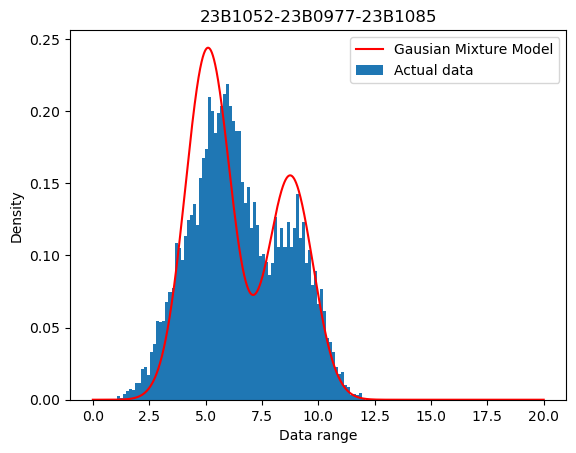

In [12]:
root = scipy.optimize.fsolve(udoublegaus,[6, 8/13, 9, 5/13])

u1 = root[0]

u2 = root[2]

# making sure that the probabilities sum upto one

root[1] += (1 - root[1] - root[3])/2
root[3] += (1 - root[1] - root[3])/2

p1 = root[1]
p2 = 1 - p1

print(f"The mean_1 is {u1}, prob_1 is {p1}, mean_2 is {u2}, prob_2 is {p2}")

x = np.linspace(0,20, 10000)

dist_1 = stats.norm(root[0], 1)
pdf_1 = dist_1.pdf(x)


dist_2 = stats.norm(root[2], 1)
pdf_2 = dist_2.pdf(x)

gmm = p1 * pdf_1 + p2 * pdf_2

plt.title("23B1052-23B0977-23B1085")
plt.xlabel("Data range")
plt.ylabel("Density")

plt.plot(x, gmm, color = "red", label = "Gausian Mixture Model")
plt.hist(data, bins = bins, density=True, label = "Actual data")
plt.legend()
plt.savefig("3f.png")
plt.show()




In [13]:
# likelihood of the GMM

l_gmm = np.exp(np.mean(np.log(p1 * dist_1.pdf(data) + p2 * dist_2.pdf(data))))

if (l_gmm > l_g): 
    print(f"Gausian Mixture Model is better than Binomial by {l_gmm - l_b}")
    print("The order of likelihood is GMM, Binomial, Gamma")
else:

    if (l_gmm > l_g):
        print("The order of likelihood is Binomial, GMM, Gamma")
    else:
        print("The order of likelihood is Binomial, Gamma, GMM")


The order of likelihood is Binomial, Gamma, GMM
